<a href="https://colab.research.google.com/github/Voland24/MachineLearning-with-PyTorch-and-scikit-learn/blob/main/Chapter_1_Artificial_Neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple ML classifiers

This notebook will cover perceptrons and adaptive linear neurons, two of the simpler classification algorithms.
They will be used to classify the Iris dataset.

Pecpetrons are also called MCP for MClough Pitts Perceptrons. It tries to mimic the function of the humnan neuron and it's seemingly binary and linear decision boundary, it either fires or it doesn't if the inputs are above a certain threshold value.

The general idea here is to utilize a so called decision function i.e. an activation function that either fires or not based on the inputs the neuron recevies. The neuron does simple calculations, it performs a linear combination of the input values and the weights associated with the neruon and that output is the input into the decision function.

If the output of the decision function is greater than some theta, then it outputs 1, else it outputs 0.

This theta term can be put into the neuron itself as its bias term so the decision is if the output is greater than 0 it outputs 1, else its 0.



Here we can closely observe how the algorithms works

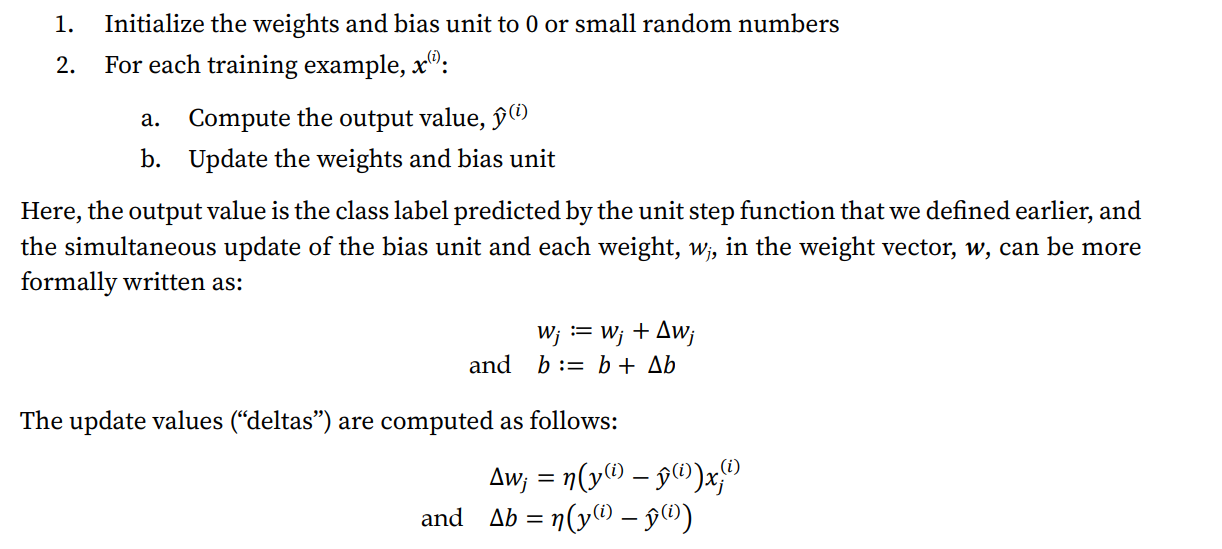



the term in the update rule is called learning rate and it's usually between 0.0 and 1.0, y(i) and yhat(i) are the ground truth and the model's prediction

Important to note that the perceptron only works if the classes are linearly separable that is if there is a linear decision boundary that can be used to separate the classes. If there isn't such a boundary, we would have to use a limited number of epochs for training the model or tell the model the acceptable number of missclassifications, otherwise the model would never stop updating.

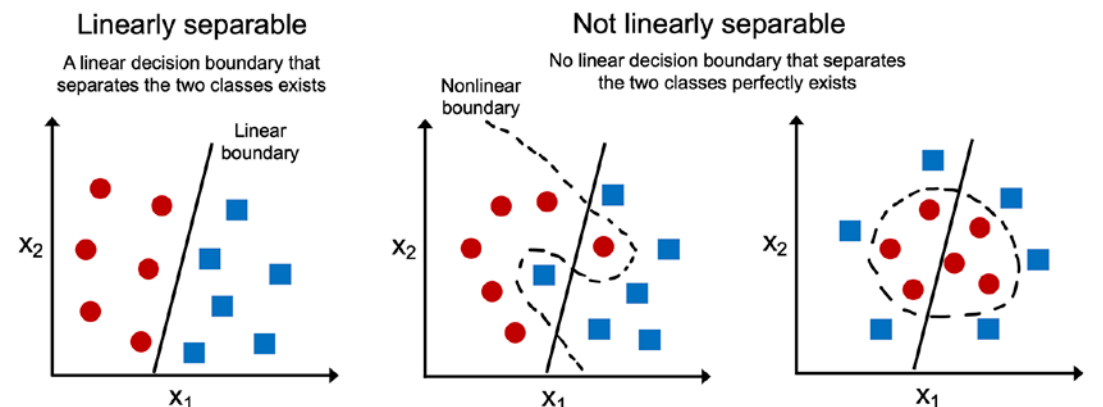

The perceptron here will be implemented as an object oriented api 

In [16]:
import numpy as np

class Perceptron:
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta #learning rate
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    #shape of X is [n_examples, n_features]
    #y shape is [n_examples]
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  def predict(self,X):
    return np.where(self.net_input(X) >= 0.0,1,0)


The bias is initially set to 0 in the fit method and the weights vector is set to values chosen from a normal distribution of stand dev of 0.01

The weights could have been init to 0, but then the learning_rate would have no effect on the decision boundary. It would only effect the scale of the weight vector, not its direction. 
The for loop loops over all the training examples and updates the weights and biases via its learning rule.
The predict method outputs a class for the given input and it's used in training as well as inference on new data points in the future.

We will use the perceptron to classify the Iris dataset and only 2 out of 3 classes in it, setosa and versicolor. We do this becasuse the perceptron is a binary classifier. It can be extended, as all binary classifiers to be multi class with OvA technique. We train a classifier per class and choose the one with the highest confidence.

In [4]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.head()



,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We now fetch the first 100 examples, 50 versicolor and 50 setosa and assign numerical values to class labels, 1 versicolor and 0 setosa. We assign these values to a y vector, for these are our targets.
Also, we fetch the 1. and 3. column or features from the table and assign them to a matrix X, these are our features.

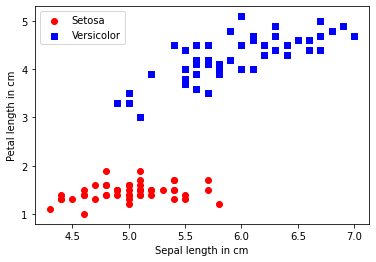

In [5]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values #get the index 4 column values 
y = np.where(y == 'Iris-setosa', 0, 1) #assign 0 where setosa, else 1
X = df.iloc[0:100, [0,2]].values #get first and third column values
plt.scatter(X[:50,0], X[:50,1], color = 'red', marker = 'o', label ='Setosa') #first 50 examples are setosa
plt.scatter(X[50:100,0], X[50:100,1], color = 'blue', marker = 's', label ='Versicolor') #next 50 are  versicolor
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.legend(loc = 'upper left')
plt.show()


We can see that for these two given classes and these two given features to describe them, a linear boundary is sufficient to separate them completely and a MCP will suffice.

In [13]:
print(y[51:100])


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


Let's train the perceptron

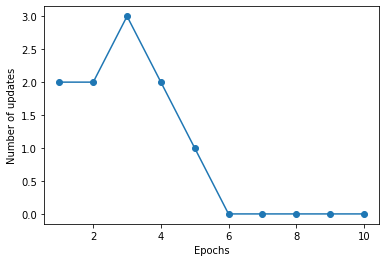

In [17]:
ppn = Perceptron(eta = 0.1,  n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

We can see that after 6 epochs the number of updates converges to zero, meaning the perceptron makes no further mistakes. The number of updates is the same as the number of errors or misclassifications as the learning rule updates only in case of mistakes.

This is a function to draw the decision boundary of any classifier, as a helper method.

In [14]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y, classifier, resolution = 0.02):
  markers = ('o','s', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1,xx2,lab,alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = f'Class {cl}', edgecolor = 'black')
  

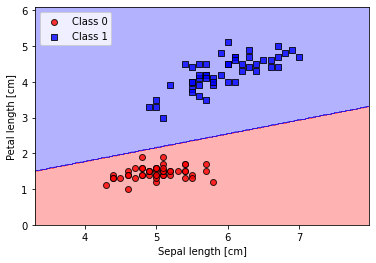

In [18]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


We can see that the perceptron has found a linear decision boundary and has perfectly separated the different classes of Irises.

The problem of convergence is a problem in the perceptron. It can only learn linearly separable decision boundaries. If the classes in question cannot be linearly separated, the algorithm will never converge and will keep updating forever, unless a max number of iterations is set.